<a href="https://colab.research.google.com/drive/1dNlmkUkLFmbUaE44e0S8_sxEYSjWniAX?usp=sharing">
  <img align="center" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [6]:
!gdown --id 1jBCFXegHp4veia-Prjlso7lkbdu2Zpng

Downloading...
From: https://drive.google.com/uc?id=1jBCFXegHp4veia-Prjlso7lkbdu2Zpng
To: /content/Mall_Customers.csv
100% 3.98k/3.98k [00:00<00:00, 2.98MB/s]


In [18]:
import pandas as pd
data = pd.read_csv("Mall_Customers.csv")
data.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39


In [19]:
data["Gender"].replace( {"Female" : 0 ,"Male" : 1},inplace=True)
data["Gender"]

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [24]:
from sklearn.cluster import KMeans

X = data.drop(["CustomerID","Gender"],axis=1)
cluster = []
for i in range (1,11,1):
  kmeans = KMeans(n_clusters=i).fit(X)
  cluster.append(kmeans.inertia_)

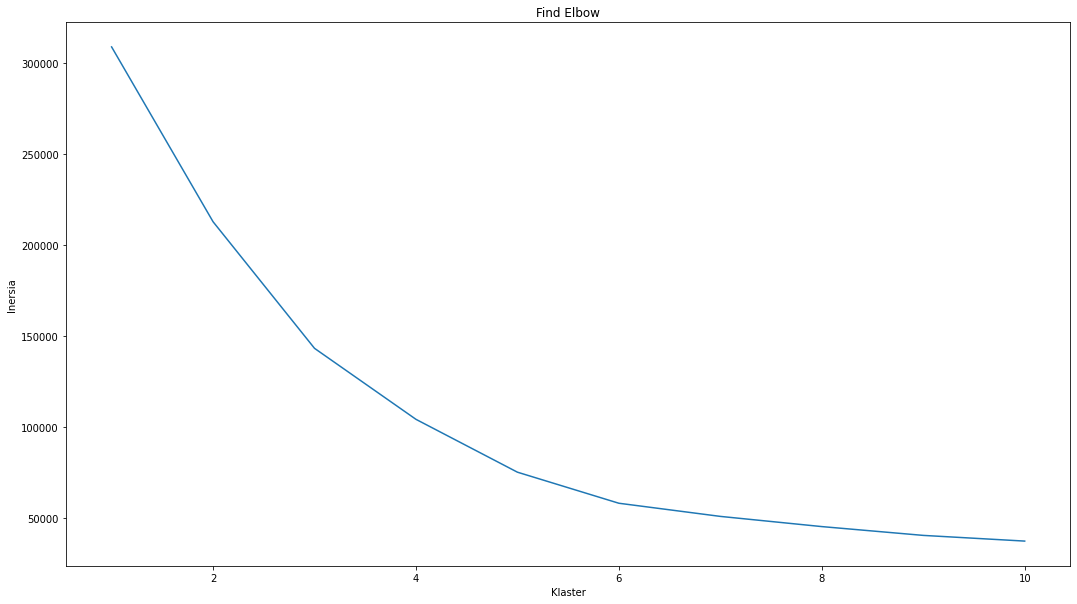

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plt.title("Find Elbow")
plt.xlabel("Klaster")
plt.ylabel("Inersia")
plt.plot(range(1,11),cluster)


In [33]:
X.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

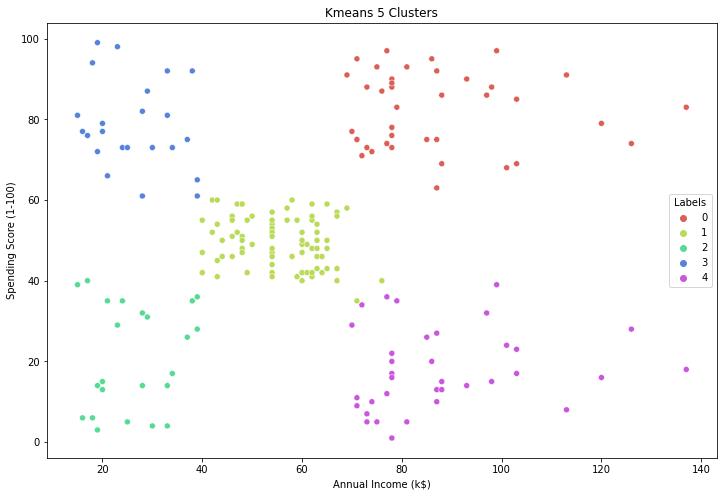

In [39]:
kmeansBest = KMeans(n_clusters=5).fit(X)
X["Labels"] = kmeansBest.labels_
import seaborn as sns
plt.figure(figsize=(12,8))
sns.scatterplot(x=X["Annual Income (k$)"],y=X["Spending Score (1-100)"],hue=X["Labels"],
                palette=sns.color_palette("hls",5))
plt.title("Kmeans 5 Clusters")
plt.show()